In [2]:
import numpy as np
import pandas as pd
import recombination as rb
import timeit

# Please, to run the experiment donwload the following dataset and put it in the /Datasets folder:
# 	- 3D_spatial_network.txt - 
#       https://archive.ics.uci.edu/ml/machine-learning-databases/00246/3D_spatial_network.txt

filename = "Datasets/3D_spatial_network.txt"
df = pd.read_csv(filename, sep=',', usecols=[1,2,3])
df = df.dropna()

print(list(df.columns.values) )

['9.3498486', '56.7408757', '17.0527715677876']


In [3]:
df.columns = ['Longitude', 'Latitude', 'Altitude']
print(list(df.columns.values))

df['Longitude'] = pd.to_numeric(df['Longitude'], errors='coerce')
df['Latitude'] = pd.to_numeric(df['Latitude'], errors='coerce')
df['Altitude'] = pd.to_numeric(df['Altitude'], errors='coerce')

df = df.dropna()

print(df.shape)
print(df.dtypes)

df.head()

['Longitude', 'Latitude', 'Altitude']
(434873, 3)
Longitude    float64
Latitude     float64
Altitude     float64
dtype: object


,Longitude,Latitude,Altitude
0,9.350188,56.740679,17.614840
1,9.350549,56.740544,18.083536
2,9.350806,56.740484,18.279465
3,9.351053,56.740486,18.422974
4,9.351475,56.740502,19.124889


In [4]:
x = df[['Longitude','Latitude']]
x = x.to_numpy()
y = df['Altitude']
y = y.to_numpy()
n = x.shape[1]

In [5]:
print(x.shape)
X = np.append(x,y[np.newaxis].T,1)

xy_sq = rb.tens_sq(X)

print(xy_sq.shape)
print(xy_sq[:,n+1:].shape)

N, d = xy_sq[:,n+1:].shape

(434873, 2)
(434873, 9)
(434873, 6)


In [6]:
mean_t = 0.

time_rand = []
iterations_rand = []

min_t = np.inf
max_t = 0.
sample = 1000

COV = np.matmul(x.T,x)/N

for i in range(sample):
    
    tic = timeit.default_timer()
    w_star, idx_star, _, _, _, iterations, eliminated_points = rb.recomb_Mor_reset(
                    xy_sq[:,n+1:]-np.mean(xy_sq[:,n+1:],0), 400)

    time_rand.append((timeit.default_timer()-tic)*1000)
    iterations_rand.append(iterations)
    
    ################ CHECK THE BARYCENTER IS THE SAME
    COV_recomb = np.zeros(COV.shape)
    jj = 0 
    for j in idx_star:
        tmp = np.matmul(x[j,:][np.newaxis].T,x[j,:][np.newaxis])
        COV_recomb += tmp * w_star[jj]
        jj += 1
    
    assert np.allclose(COV_recomb,COV), "ERROR COV != COV_RECOMB"
    ################ CHECK FINISHED
    
    mean_t += time_rand[-1]
    print("sample = ", i)
    print("time = ", time_rand[-1], "ms")
    print("mean time = ", mean_t/(i+1), "ms")

    
min_t = min(time_rand)
max_t = max(time_rand)

print("---------------------------------------")
print("max t = ", max_t, "ms")
print("min t = ", min_t, "ms")
print("mean = ", mean_t/sample, "ms")
print("std = ", np.std(time_rand))
print("---------------------------------------")

/Users/fcosentino/OneDrive/__PhD Oxf ATI - CS/_Courses/_Recombination/_CODE Recombination/Official recomb/recombination.py:376: RuntimeWarning: invalid value encountered in less_equal
  tmp_1 = np.transpose(AX<=0)
/Users/fcosentino/OneDrive/__PhD Oxf ATI - CS/_Courses/_Recombination/_CODE Recombination/Official recomb/recombination.py:401: RuntimeWarning: invalid value encountered in greater
  tmp_2 = np.transpose(AX>0)


sample =  0
time =  156.1701529999482 ms
mean time =  156.1701529999482 ms
sample =  1
time =  19.581574000312685 ms
mean time =  87.87586350013044 ms
sample =  2
time =  18.826368000190996 ms
mean time =  64.85936500015062 ms
sample =  3
time =  19.82942600034221 ms
mean time =  53.60188025019852 ms
sample =  4
time =  62.77363199978936 ms
mean time =  55.43623060011669 ms
sample =  5
time =  60.937292000289744 ms
mean time =  56.3530741668122 ms
sample =  6
time =  132.77530499999557 ms
mean time =  67.27053571440982 ms
sample =  7
time =  18.945822999739903 ms
mean time =  61.22994662507608 ms
sample =  8
time =  99.38435399999435 ms
mean time =  65.46932522228923 ms
sample =  9
time =  18.9512290003222 ms
mean time =  60.81751560009252 ms
sample =  10
time =  53.212167999845406 ms
mean time =  60.12612036370642 ms
sample =  11
time =  20.00628299992968 ms
mean time =  56.78280058339169 ms
sample =  12
time =  19.395733999772347 ms
mean time =  53.90687238465174 ms
sample =  13
time

/Users/fcosentino/opt/anaconda3/lib/python3.7/site-packages/numpy/linalg/linalg.py:1872: RuntimeWarning: invalid value encountered in greater
  return count_nonzero(S > tol, axis=-1)


sample =  931
time =  113.56180900020263 ms
mean time =  56.825686530041544 ms
sample =  932
time =  21.92337199994654 ms
mean time =  56.788277832796 ms
sample =  933
time =  174.3536059998405 ms
mean time =  56.914150775159 ms
sample =  934
time =  20.61484100022426 ms
mean time =  56.87532798395586 ms
sample =  935
time =  58.47900600019784 ms
mean time =  56.8770413151698 ms
sample =  936
time =  76.76358800017624 ms
mean time =  56.898264950906196 ms
sample =  937
time =  101.32139799998185 ms
mean time =  56.94562436780287 ms
sample =  938
time =  19.63877299976957 ms
mean time =  56.90589396166013 ms
sample =  939
time =  18.39497700029824 ms
mean time =  56.86492490106293 ms
sample =  940
time =  98.53800800010504 ms
mean time =  56.90921085547211 ms
sample =  941
time =  52.793820000260894 ms
mean time =  56.904842075371036 ms
sample =  942
time =  54.6985279997898 ms
mean time =  56.902502399787174 ms
sample =  943
time =  126.26372299973809 ms
mean time =  56.975978269066786

In [7]:
mean_t = 0.
sample = 100
time_MT = []

min_t = np.inf
max_t = 0.

COV = np.matmul(x.T,x)/N

for i in range(sample):
    
    x_cp = np.copy(xy_sq[:,n+1:])
    
    tic = timeit.default_timer()
    w_star, idx_star, _, _, _, iterations, eliminated_points = rb.Tchernychova_Lyons(
                    x_cp)
    time_MT.append((timeit.default_timer()-tic)*1000)

    
    ################ CHECK THE BARYCENTER IS THE SAME
    COV_recomb = np.zeros(COV.shape)
    jj = 0 
    for j in idx_star:
        tmp = np.matmul(x[j,:][np.newaxis].T,x[j,:][np.newaxis])
        COV_recomb += tmp * w_star[jj]
        jj += 1
    
    assert np.allclose(COV_recomb,COV), "ERROR COV != COV_RECOMB"
    ################ CHECK FINISHED
    
    mean_t += time_MT[-1]
    print("sample = ", i)
    print("time = ", time_MT[-1], "ms")
    print("mean time = ", mean_t/(i+1), "ms")

    
min_t = min(time_MT)
max_t = max(time_MT)

print("---------------------------------------")
print("max t = ", max_t, "ms")
print("min t = ", min_t, "ms")
print("mean = ", mean_t/sample, "ms")
print("std FC = ", np.std(time_MT))
print("---------------------------------------")

/Users/fcosentino/OneDrive/__PhD Oxf ATI - CS/_Courses/_Recombination/_CODE Recombination/Official recomb/recombination.py:882: RuntimeWarning: invalid value encountered in true_divide
  alpha = mu/Phi[:,0]


sample =  0
time =  62.80580800012103 ms
mean time =  62.80580800012103 ms
sample =  1
time =  54.83391699999629 ms
mean time =  58.81986250005866 ms
sample =  2
time =  56.13423600016176 ms
mean time =  57.924653666759696 ms
sample =  3
time =  70.262157000343 ms
mean time =  61.00902950015552 ms
sample =  4
time =  70.10236599990094 ms
mean time =  62.827696800104604 ms
sample =  5
time =  66.62978000031217 ms
mean time =  63.461377333472534 ms
sample =  6
time =  64.88458299963895 ms
mean time =  63.664692428639164 ms
sample =  7
time =  65.80189899977995 ms
mean time =  63.93184325003176 ms
sample =  8
time =  65.97113199995874 ms
mean time =  64.15843088891253 ms
sample =  9
time =  64.8748820003675 ms
mean time =  64.23007600005803 ms
sample =  10
time =  64.86263900023914 ms
mean time =  64.28758172734723 ms
sample =  11
time =  67.82975499982058 ms
mean time =  64.58276283338667 ms
sample =  12
time =  65.62420699992799 ms
mean time =  64.66287392312061 ms
sample =  13
time =  

In [8]:
from Maalouf_Jubran_Feldman import Fast_Caratheodory

time_FC = []
mean_t = 0.

for i in range(100):
    tic = timeit.default_timer()
    Fast_Caratheodory(xy_sq[:,n+1:],np.ones(N),d+1)
    time_FC.append((timeit.default_timer()-tic)*1000)
    mean_t += time_FC[-1]
    print("sample = ", i)
    print("time = ", time_FC[-1], "ms")
    print("mean time = ", mean_t/(i+1), "ms")


print("---------------------------------------")
print("max FC = ", np.max(time_FC), " ms")
print("min FC = ", np.min(time_FC), " ms")   
print("mean FC = ", np.mean(time_FC), " ms")
print("std FC = ", np.std(time_FC))
print("---------------------------------------")

sample =  0
time =  87.00146799992581 ms
mean time =  87.00146799992581 ms
sample =  1
time =  92.1169389998795 ms
mean time =  89.55920349990265 ms
sample =  2
time =  89.03882100003102 ms
mean time =  89.3857426666121 ms
sample =  3
time =  92.61159500010763 ms
mean time =  90.19220574998599 ms
sample =  4
time =  89.86552599981223 ms
mean time =  90.12686979995124 ms
sample =  5
time =  88.3457240001917 ms
mean time =  89.83001216665798 ms
sample =  6
time =  98.63854100012759 ms
mean time =  91.08837342858222 ms
sample =  7
time =  92.19612400011101 ms
mean time =  91.22684225002331 ms
sample =  8
time =  93.82956300032674 ms
mean time =  91.51603344450147 ms
sample =  9
time =  91.33672600000864 ms
mean time =  91.49810270005219 ms
sample =  10
time =  86.67382300018289 ms
mean time =  91.05953181824589 ms
sample =  11
time =  88.06583799969303 ms
mean time =  90.81005733336649 ms
sample =  12
time =  89.30410599987226 ms
mean time =  90.69421492309769 ms
sample =  13
time =  88.4

In [9]:
mean_t = 0.
sample = 1000

time_log = np.zeros(sample)

min_t = 0.
max_t = 0.

COV = np.matmul(x[:,:].T,x[:,:])/N

for i in range(sample):
    x_cp = np.copy(xy_sq[:,n+1:])

    tic = timeit.default_timer()
    w_star, idx_star, _, _, _, _, _ = rb.recomb_log(x_cp)
    time_log[i] = (timeit.default_timer()-tic)*1000

    ################ CHECK THE BARYCENTER IS THE SAME
    COV_recomb = np.zeros(COV.shape)
    jj = 0 
    for j in idx_star:
        tmp = np.matmul(x[j,:][np.newaxis].T,x[j,:][np.newaxis])
        COV_recomb += tmp * w_star[jj]
        jj += 1

    assert np.allclose(COV_recomb,COV), "ERROR COV != COV_RECOMB"
    ################ CHECK FINISHED

    mean_t += time_log[i]
    print("sample = ", i)
    print("time = ", time_log[i], "ms")
    print("mean time = ", mean_t/(i+1), "ms")
    
mean_t = np.mean(time_log)
min_t = np.min(time_log)
max_t = np.max(time_log)

print("---------------------------------------")
print("max t = ", max_t, "ms")
print("min t = ", min_t, "ms")
print("mean = ", mean_t, "ms")
print("---------------------------------------")

/Users/fcosentino/OneDrive/__PhD Oxf ATI - CS/_Courses/_Recombination/_CODE Recombination/Official recomb/recombination.py:376: RuntimeWarning: invalid value encountered in less_equal
  tmp_1 = np.transpose(AX<=0)
/Users/fcosentino/OneDrive/__PhD Oxf ATI - CS/_Courses/_Recombination/_CODE Recombination/Official recomb/recombination.py:401: RuntimeWarning: invalid value encountered in greater
  tmp_2 = np.transpose(AX>0)


sample =  0
time =  35.865680999904725 ms
mean time =  35.865680999904725 ms
sample =  1
time =  27.318270000250777 ms
mean time =  31.59197550007775 ms
sample =  2
time =  26.31547800001499 ms
mean time =  29.833143000056833 ms
sample =  3
time =  26.472040000044217 ms
mean time =  28.992867250053678 ms
sample =  4
time =  26.546637999672384 ms
mean time =  28.50362139997742 ms
sample =  5
time =  25.966673999846535 ms
mean time =  28.08079683328894 ms
sample =  6
time =  31.870606999746087 ms
mean time =  28.62219828563996 ms
sample =  7
time =  33.913434999703895 ms
mean time =  29.28360287489795 ms
sample =  8
time =  35.281715000110125 ms
mean time =  29.950059777699305 ms
sample =  9
time =  37.47198699966248 ms
mean time =  30.70225249989562 ms
sample =  10
time =  34.91649699981281 ms
mean time =  31.08536563625173 ms
sample =  11
time =  35.99150099989856 ms
mean time =  31.494210249888965 ms
sample =  12
time =  36.267339999994874 ms
mean time =  31.86137407682019 ms
sample =

/Users/fcosentino/opt/anaconda3/lib/python3.7/site-packages/numpy/linalg/linalg.py:1872: RuntimeWarning: invalid value encountered in greater
  return count_nonzero(S > tol, axis=-1)


sample =  807
time =  35.93071199975384 ms
mean time =  33.88440168317057 ms
sample =  808
time =  33.46268300037991 ms
mean time =  33.883880399261066 ms
sample =  809
time =  33.870260000185226 ms
mean time =  33.88386358395357 ms
sample =  810
time =  31.815247999929852 ms
mean time =  33.88131288656266 ms
sample =  811
time =  32.059550999747444 ms
mean time =  33.87906933744097 ms
sample =  812
time =  30.759190000026138 ms
mean time =  33.87523184748105 ms
sample =  813
time =  32.790949999707664 ms
mean time =  33.873899805899015 ms
sample =  814
time =  31.31265499996516 ms
mean time =  33.870757174235294 ms
sample =  815
time =  34.33334900000773 ms
mean time =  33.871324075982564 ms
sample =  816
time =  30.957201999626704 ms
mean time =  33.867757219095964 ms
sample =  817
time =  30.459628000244265 ms
mean time =  33.863590801958 ms
sample =  818
time =  32.66665000001012 ms
mean time =  33.862129335777354 ms
sample =  819
time =  31.27295900003446 ms
mean time =  33.858971

In [10]:
time_rand = np.array(time_rand)
iterations_rand = np.array(iterations_rand)
time_FC = np.array(time_FC)
time_log = np.array(time_log)
time_MT = np.array(time_MT)

np.set_printoptions(precision=1)

print("Probability to be faster = ", 
            np.sum(np.array(time_rand)<np.mean(time_FC))/sample*100, "%")
print("Probability to be 4x faster = ", 
            np.sum(np.array(time_rand)<np.mean(time_FC)/4)/sample*100, "%")

print("Standard deviation = ", np.std(time_rand))

print("The expected time of the log-random is ", np.mean(time_log), "ms")

print("Standard deviation of the log-random is  = ", np.std(time_log))

np.set_printoptions(precision=1)
print('''Some statistics for the randomized algorithm are: 
      average running time = ''', np.round(np.mean(time_rand),1),  
      "ms, min = " , np.round(np.min(time_rand),1), "ms, max = ", np.round(np.max(time_rand),1),
      "ms, std ", np.round(np.std(time_rand),1), 
      "ms. Using the log-random strategy they are: average running time = ", np.round(np.mean(time_log),1),
      "ms, min = ", np.round(np.min(time_log),1), "ms, max = ", np.round(np.max(time_log),1),
      ", std = ", np.round(np.std(time_log),1), "ms.",
      " Average runnig times of determinsitic: TL = ", np.round(np.mean(time_MT),1),
      "ms, MJF = ", np.round(np.mean(time_FC),1),"ms.")

Probability to be faster =  78.9 %
Probability to be 4x faster =  49.0 %
Standard deviation =  56.02690814242285
The expected time of the log-random is  33.36610134900093 ms
Standard deviation of the log-random is  =  2.320460220274161
Some statistics for the randomized algorithm are: 
      average running time =  56.2 ms, min =  18.0 ms, max =  455.6 ms, std  56.0 ms. Using the log-random strategy they are: average running time =  33.4 ms, min =  26.0 ms, max =  43.2 , std =  2.3 ms.  Average runnig times of determinsitic: TL =  66.3 ms, MJF =  96.3 ms.


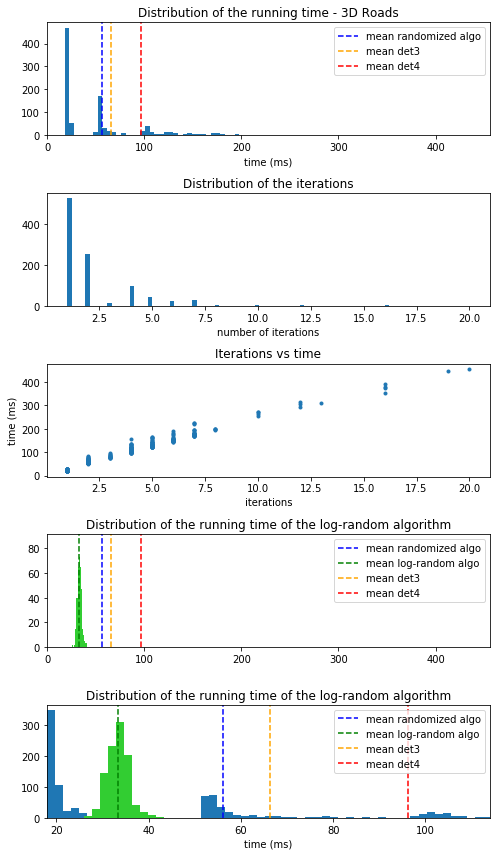

In [12]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(5,1,figsize=(7,12))

################################################
plt.subplot(5, 1, 1)

plt.hist(time_rand, bins=int(90))
plt.axvline(np.mean(time_rand), 0, max(time_rand), linestyle='dashed', color="blue", label="mean randomized algo")
plt.axvline(np.mean(time_MT), 0, max(time_MT), linestyle='dashed', color="orange", label="mean det3")
plt.axvline(np.mean(time_FC), 0, max(time_rand), linestyle='dashed', color="red", label="mean det4")

plt.xlim((0, max(time_rand)))

plt.legend()
plt.title('Distribution of the running time - 3D Roads')
plt.xlabel('time (ms)')

################################################
plt.subplot(5, 1, 2)

plt.hist(iterations_rand, bins=int(90))
plt.title('Distribution of the iterations')
plt.xlabel('number of iterations')
plt.xscale('linear')

################################################
plt.subplot(5, 1, 3)

plt.plot(iterations_rand,time_rand, '.')
plt.xlabel('iterations')
plt.ylabel('time (ms)')
plt.title('Iterations vs time')

################################################
plt.subplot(5, 1, 4)

plt.hist(time_log, bins=int(40),color='limegreen')
plt.axvline(np.mean(time_rand), linestyle='dashed', color="blue", label="mean randomized algo")
plt.axvline(np.mean(time_log), linestyle='dashed', color="green", label="mean log-random algo")
plt.axvline(np.mean(time_MT), linestyle='dashed', color="orange", label="mean det3")
plt.axvline(np.mean(time_FC), linestyle='dashed', color="red", label="mean det4")
plt.xlim((0, max(time_rand)))
plt.legend()
plt.title('Distribution of the running time of the log-random algorithm')

################################################
plt.subplot(5, 1, 5)

plt.hist(time_rand, bins=int(250))
plt.hist(time_log, bins=int(10),color='limegreen')
plt.axvline(np.mean(time_rand), 0, max(time_rand), linestyle='dashed', color="blue", label="mean randomized algo")
plt.axvline(np.mean(time_log), 0, max(time_log), linestyle='dashed', color="green", label="mean log-random algo")
plt.axvline(np.mean(time_MT), 0, max(time_MT), linestyle='dashed', color="orange", label="mean det3")
plt.axvline(np.mean(time_FC), 0, max(time_rand), linestyle='dashed', color="red", label="mean det4")
plt.xlim((min(time_rand), max(time_rand)/4.))

plt.legend()
plt.title('Distribution of the running time of the log-random algorithm')
plt.xlabel('time (ms)')

fig.tight_layout()
# plt.savefig('Distrib_running_time_3DRoads.pdf')#, bbox_inches='tight')
plt.show()



In [11]:
mean_t = 0.

time_combined = []

min_t = np.inf
max_t = 0.
sample = 1000

COV = np.matmul(x.T,x)/N

for i in range(sample):
    
    tic = timeit.default_timer()
    w_star, idx_star, _, _, _, iterations, eliminated_points = rb.recomb_combined(
                    xy_sq[:,n+1:], 400)

    time_combined.append((timeit.default_timer()-tic)*1000)
    
    ################ CHECK THE BARYCENTER IS THE SAME
    COV_recomb = np.zeros(COV.shape)
    jj = 0 
    for j in idx_star:
        tmp = np.matmul(x[j,:][np.newaxis].T,x[j,:][np.newaxis])
        COV_recomb += tmp * w_star[jj]
        jj += 1
    
    assert np.allclose(COV_recomb,COV), "ERROR COV != COV_RECOMB"
    ################ CHECK FINISHED
    
    mean_t += time_combined[-1]
    print("sample = ", i)
    print("time = ", time_combined[-1], "ms")
    print("mean time = ", mean_t/(i+1), "ms")

    
min_t = min(time_combined)
max_t = max(time_combined)

print("---------------------------------------")
print("max t = ", max_t, "ms")
print("min t = ", min_t, "ms")
print("mean = ", mean_t/sample, "ms")
print("std = ", np.std(time_combined))
print("---------------------------------------")

sample =  0
time =  35.263493999991624 ms
mean time =  35.263493999991624 ms
sample =  1
time =  34.74281399999768 ms
mean time =  35.00315399999465 ms
sample =  2
time =  29.999355999990485 ms
mean time =  33.335221333326594 ms
sample =  3
time =  29.582696000005626 ms
mean time =  32.39708999999635 ms
sample =  4
time =  29.452130000009902 ms
mean time =  31.808097999999063 ms
sample =  5
time =  31.175512000004346 ms
mean time =  31.702666999999945 ms
sample =  6
time =  31.52895499999886 ms
mean time =  31.677850999999787 ms


/Users/fcosentino/OneDrive/__PhD Oxf ATI - CS/_Courses/_CODE Recombination/Official recomb/recombination.py:376: RuntimeWarning: invalid value encountered in less_equal
  tmp_1 = np.transpose(AX<=0)
/Users/fcosentino/OneDrive/__PhD Oxf ATI - CS/_Courses/_CODE Recombination/Official recomb/recombination.py:401: RuntimeWarning: invalid value encountered in greater
  tmp_2 = np.transpose(AX>0)


sample =  7
time =  38.96983899997508 ms
mean time =  32.5893494999967 ms
sample =  8
time =  37.96404999999936 ms
mean time =  33.18653844444144 ms
sample =  9
time =  36.26390899998455 ms
mean time =  33.49427549999575 ms
sample =  10
time =  37.09518499999831 ms
mean time =  33.82163090908689 ms
sample =  11
time =  34.01549500000556 ms
mean time =  33.83778624999678 ms
sample =  12
time =  36.98463199998514 ms
mean time =  34.079851307688195 ms
sample =  13
time =  36.300586999999496 ms
mean time =  34.23847528571043 ms
sample =  14
time =  36.40834300000506 ms
mean time =  34.38313313333007 ms
sample =  15
time =  33.54951500000425 ms
mean time =  34.33103199999721 ms
sample =  16
time =  36.82118200001128 ms
mean time =  34.47751141176274 ms
sample =  17
time =  32.51456699999267 ms
mean time =  34.36845894444218 ms
sample =  18
time =  34.3937359999984 ms
mean time =  34.369789315787244 ms
sample =  19
time =  37.039260999989665 ms
mean time =  34.50326289999737 ms
sample =  20


/Users/fcosentino/OneDrive/__PhD Oxf ATI - CS/_Courses/_CODE Recombination/Official recomb/recombination.py:882: RuntimeWarning: invalid value encountered in true_divide
  alpha = mu/Phi[:,0]


sample =  90
time =  37.962770999996565 ms
mean time =  35.720186439558546 ms
sample =  91
time =  39.15976100000762 ms
mean time =  35.757573119563425 ms
sample =  92
time =  37.56434999999669 ms
mean time =  35.777000827955185 ms
sample =  93
time =  36.63726000002043 ms
mean time =  35.78615252127502 ms
sample =  94
time =  35.772173999987444 ms
mean time =  35.78600537894568 ms
sample =  95
time =  38.83196000001021 ms
mean time =  35.8177340729151 ms
sample =  96
time =  38.62042100001872 ms
mean time =  35.84662775257596 ms
sample =  97
time =  36.99242299998673 ms
mean time =  35.858319540814854 ms
sample =  98
time =  37.10527700002331 ms
mean time =  35.87091507070585 ms
sample =  99
time =  37.5710399999889 ms
mean time =  35.88791631999867 ms
sample =  100
time =  37.95057000002089 ms
mean time =  35.90833863366226 ms
sample =  101
time =  36.640349000009564 ms
mean time =  35.91551520588135 ms
sample =  102
time =  36.51877199999376 ms
mean time =  35.921372067960114 ms
sam

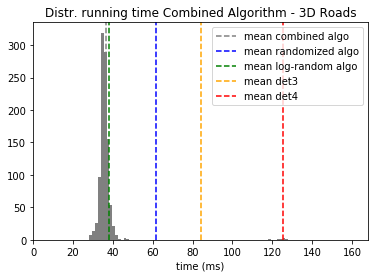

In [18]:
maximum = max(np.mean(time_rand),np.mean(time_log),np.mean(time_MT),np.mean(time_rand),np.mean(time_combined))*2

plt.hist(time_combined,bins=int(70),color='grey')
plt.axvline(np.mean(time_combined), linestyle='dashed', color="grey", label="mean combined algo")
plt.axvline(np.mean(time_rand), linestyle='dashed', color="blue", label="mean randomized algo")
plt.axvline(np.mean(time_log), linestyle='dashed', color="green", label="mean log-random algo")
plt.axvline(np.mean(time_MT), linestyle='dashed', color="orange", label="mean det3")
plt.axvline(np.mean(time_FC), linestyle='dashed', color="red", label="mean det4")
plt.xlim((0, maximum))

plt.legend()
plt.title('Distr. running time Combined Algorithm - 3D Roads')
plt.xlabel('time (ms)')

fig.tight_layout()
# plt.savefig('Distrib_running_time_3DRoads_combined.pdf')#, bbox_inches='tight')
plt.show()